In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df =pd.read_csv("spotify.csv")
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [ ]:
df.isnull().sum()
#no null values is present in the dataset

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df.duplicated().sum()

27

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

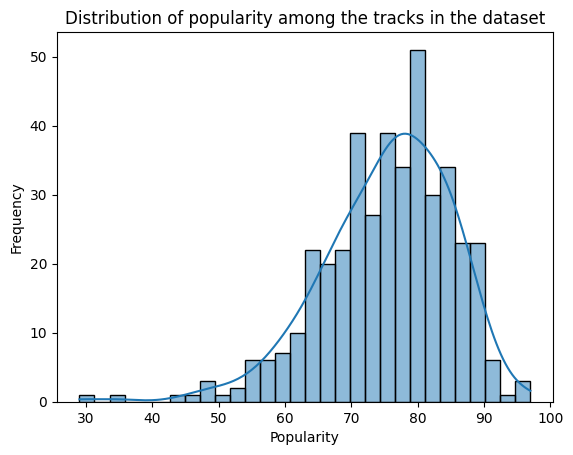

In [ ]:
sns.histplot(df["Popularity"],kde=True,bins=30)
plt.title("Distribution of popularity among the tracks in the dataset")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

-->THERE IS HIGH POPULARITY FOR THE TRACK WHOSE DURATION IS BETWEEN 1.67 MIN TO 4.17 MIN APPROX

<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

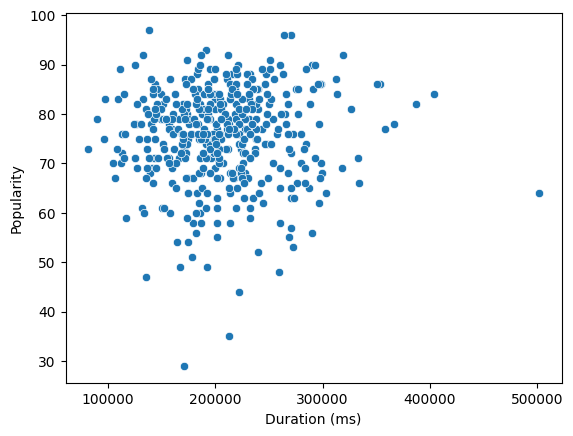

In [ ]:
sns.scatterplot(x="Duration (ms)",y="Popularity",data=df)

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

-->Instead of visualizing each artist individually,we Focus on the top 5 artists,This reduces the number of artists in the visualization and highlights the most significant ones.

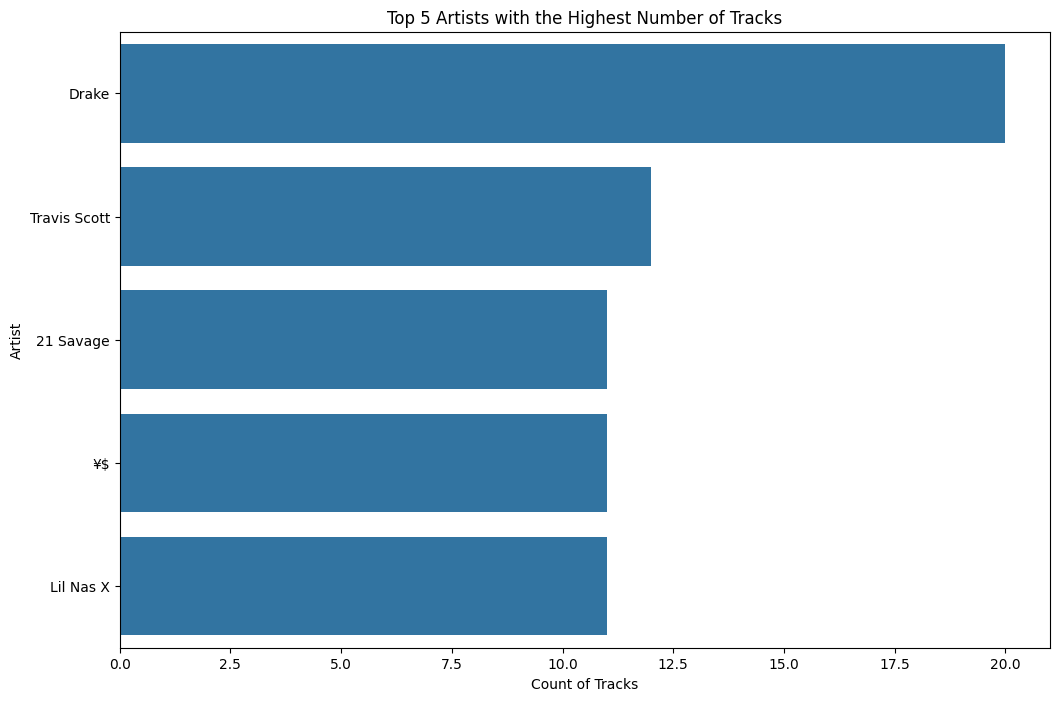

In [ ]:
artist_counts = df['Artist'].value_counts()

# Select the top 5 artists
top_5_artists = artist_counts.nlargest(5).index

# Filter the DataFrame to include only the top 5 artists
df_top_5 = df[df['Artist'].isin(top_5_artists)]

# Create the countplot
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df_top_5, order=top_5_artists)

# Add labels and title
plt.xlabel('Count of Tracks')
plt.ylabel('Artist')
plt.title('Top 5 Artists with the Highest Number of Tracks')
plt.show()


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [ ]:
df_least=df.sort_values(by="Popularity",ascending=True).reset_index()
least_popular_tracks = df_least[["Artist","Track Name","Popularity"]].head(5)
print(least_popular_tracks)

           Artist                     Track Name  Popularity
0          Pressa  Attachments (feat. Coi Leray)          29
1   Justin Bieber                     Intentions          35
2  French Montana                Splash Brothers          44
3        Lil Baby                  On Me - Remix          47
4     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [ ]:
# Assuming you have a DataFrame named df
# Sort the DataFrame by 'Popularity' in descending order
df_sorted = df.sort_values(by='Popularity', ascending=False)

# Select the top 5 artists based on the number of tracks
top_5_artists = df_sorted['Artist'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 artists
df_top_5 = df[df['Artist'].isin(top_5_artists)]

# Calculate the average popularity for each artist
avg_popularity = df_top_5.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order
avg_popularity = avg_popularity.sort_values(by='Popularity', ascending=False)

# Display the average popularity for each artist
print("Average Popularity of Top 5 Artists:")
print(avg_popularity)


Average Popularity of Top 5 Artists:
         Artist  Popularity
4  Travis Scott   87.000000
0     21 Savage   84.181818
2        Eminem   83.636364
1         Drake   83.500000
3     Lil Nas X   76.090909


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [ ]:
df_popular_artists=df.sort_values(by="Popularity",ascending=False).reset_index()
most_popular_tracks = df_popular_artists[["Artist","Track Name","Popularity"]].head(5)
print(most_popular_tracks)

         Artist                  Track Name  Popularity
0   Jack Harlow                 Lovin On Me          97
1     21 Savage                      redrum          96
2            ¥$                    CARNIVAL          96
3  Travis Scott  FE!N (feat. Playboi Carti)          93
4         cassö                       Prada          92


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?

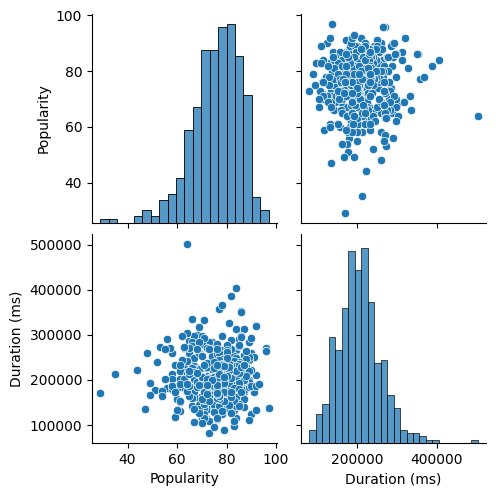

In [ ]:
sns.pairplot(df)

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?

-->Instead of visualizing each artist individually,we Focus on the top 10 artists,This reduces the number of artists in the visualization and highlights the most significant ones.

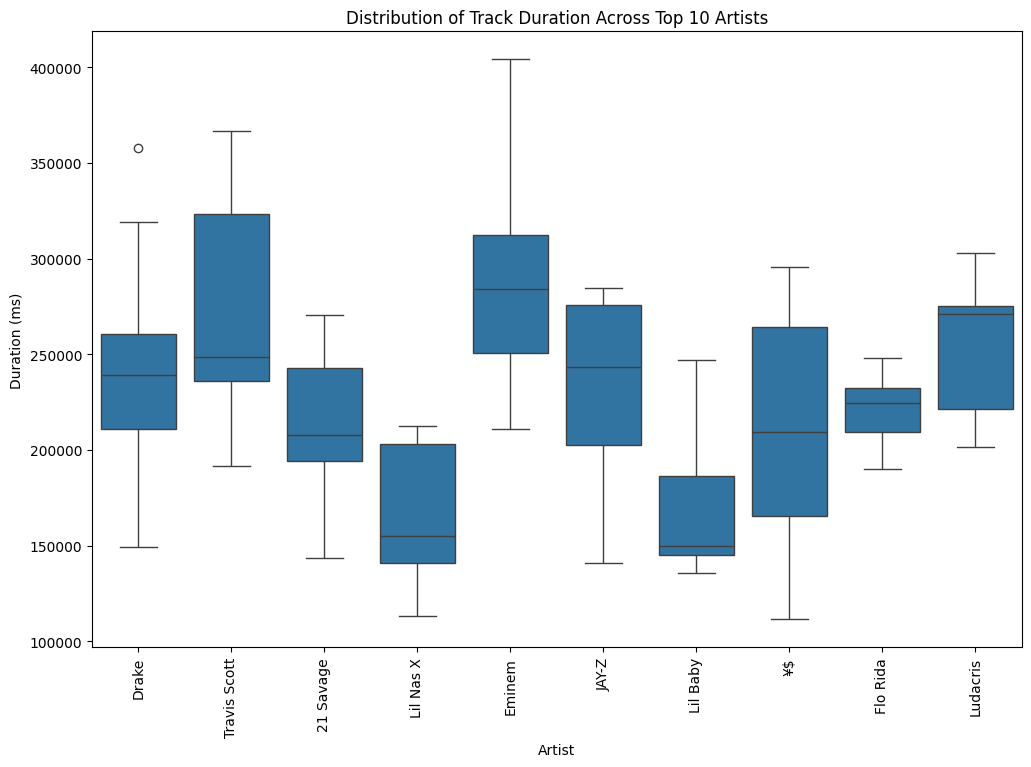

In [ ]:

# Calculate the number of tracks for each artist
artist_counts = df['Artist'].value_counts()

# Select the top 10 artists
top_10_artists = artist_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 artists
df_top_10 = df[df['Artist'].isin(top_10_artists)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top_10)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Distribution of Track Duration Across Top 10 Artists')
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot?

-->Instead of visualizing each artist individually,we Focus on the top 10 artists,This reduces the number of artists in the visualization and highlights the most significant ones.

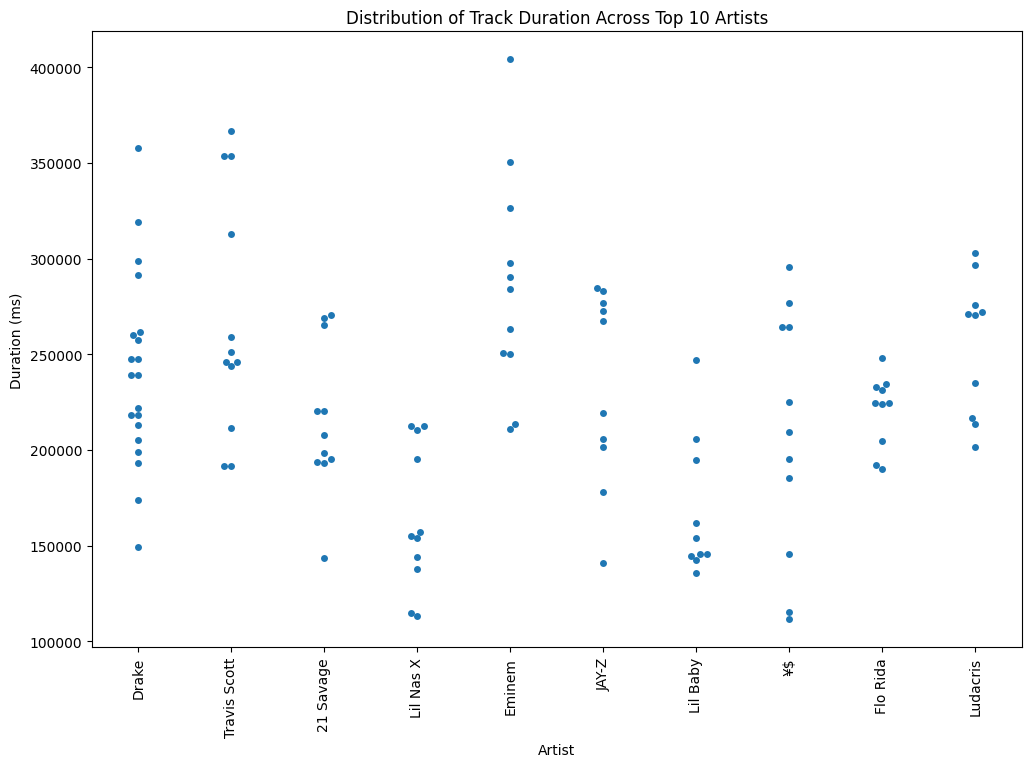

In [ ]:
# Calculate the number of tracks for each artist
artist_counts = df['Artist'].value_counts()

# Select the top 10 artists
top_10_artists = artist_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 artists
df_top_10 = df[df['Artist'].isin(top_10_artists)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Artist', y='Duration (ms)', data=df_top_10)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Distribution of Track Duration Across Top 10 Artists')
plt.show()